In [24]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [25]:
#Analisamos los datos Stations
stations = pd.read_csv('./data/station.csv', low_memory=False)

In [26]:
stations[:10]

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
5,7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,8/7/2013
6,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,8/5/2013
7,9,Japantown,37.348742,-121.894715,15,San Jose,8/5/2013
8,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
9,11,MLK Library,37.335885,-121.885660,19,San Jose,8/6/2013


In [28]:
#Vemos cuantas ahy por ciudad
count_citys = stations['city'].value_counts()
count_citys

San Francisco    35
San Jose         16
Mountain View     7
Redwood City      7
Palo Alto         5
Name: city, dtype: int64

<IPython.core.display.Javascript object>


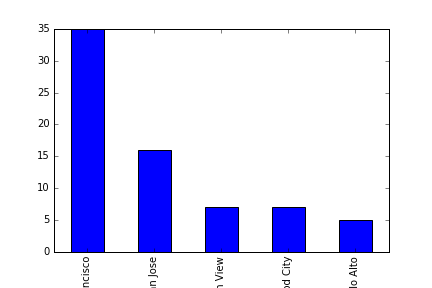

In [29]:
%matplotlib notebook
count_citys[:10].plot('bar')

In [30]:
#Vemos cuantos hay por cantidad de "dock"
count_dock = stations['dock_count'].value_counts()
count_dock

15    34
19    18
23     9
27     4
11     4
25     1
Name: dock_count, dtype: int64

In [31]:
#Vemos fecha de instalacion.
# Se remarca que se instalo mas al inico que al final. Suponemos que las obras estarian "terminadas" ya
count_isntalation = stations['installation_date'].value_counts()
count_isntalation 

8/23/2013     7
8/19/2013     6
8/20/2013     6
8/22/2013     5
8/25/2013     5
8/15/2013     5
8/21/2013     5
8/5/2013      5
8/6/2013      5
8/14/2013     4
8/12/2013     4
8/7/2013      4
12/31/2013    3
8/16/2013     3
4/9/2014      1
1/22/2014     1
2/20/2014     1
Name: installation_date, dtype: int64

In [42]:
#los demas datos y los de clima trabajan por zipCode. Por lo que "traducimos" los zipCode
tabla = {
        'zipCode': ['95113', '94063', '94041', '94107', '94301'],
        'city': ['San Jose', 'Redwood City', 'Mountain View', 'San Francisco', 'Palo Alto'],
}

tabla
df_a = pd.DataFrame(tabla, columns = ['zipCode', 'city'])
df_a

,zipCode,city
0,95113,San Jose
1,94063,Redwood City
2,94041,Mountain View
3,94107,San Francisco
4,94301,Palo Alto


In [44]:
Tara = pd.merge(stations, df_a, on='city', how='right')
Tara[:10]

,id,name,lat,long,dock_count,city,installation_date,zipCode
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013,95113
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013,95113
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013,95113
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013,95113
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013,95113
5,7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,8/7/2013,95113
6,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,8/5/2013,95113
7,9,Japantown,37.348742,-121.894715,15,San Jose,8/5/2013,95113
8,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013,95113
9,11,MLK Library,37.335885,-121.885660,19,San Jose,8/6/2013,95113


In [ ]:
#Reducimos los datos a las Id y Los ZipCode.
tablaIdZip = Tara.loc[:,("id","zipCode")]


In [55]:
#Lo guardamos para usar mas adelante
tablaIdZip.to_csv("tablIdZip.csv",cols=("id","zipCode"))

In [57]:
texs = pd.read_csv('./tablIdZip.csv', low_memory=False)
texs[:10]

,Unnamed: 0,id,zipCode
0,0,2,95113
1,1,3,95113
2,2,4,95113
3,3,5,95113
4,4,6,95113
5,5,7,95113
6,6,8,95113
7,7,9,95113
8,8,10,95113
9,9,11,95113
